<a href="https://colab.research.google.com/github/ANGIECATHERINEP/MujerDigital/blob/main/proyecto_ciencia_datos_mat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GRUPO 5** 

**Nombres: Angela Maria Zea, Angie Pinilla Nova**

**TEMA: matriculados en educación superior - pregrado en el sector de las TIC**

**APRENDIZAJE SUPERVISADO: REGRESIÓN LINEAL**



In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
from datetime import datetime
import time
import scipy
import sklearn 
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as sfm
import matplotlib as mpl
import matplotlib.pyplot as plt  
import matplotlib.dates as mdates
%matplotlib inline

import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

In [4]:
df = pd.read_csv('EST_MATRICULADOS_2005_A_2020.csv', sep=';')
df.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.



,Código IES,IES,Sector IES,Carácter IES,Código Departamento (Programa),Departamento oferta del programa,Código Municipio(Programa),Municipio oferta del programa,Código SNIES,Programa Académico,Metodología programa,NBC,Sexo,Año,Semestre,Matriculados
0,9110,SERVICIO NACIONAL DE APRENDIZAJE-SENA-,OFICIAL,INSTITUCION TECNOLOGICA,11,BOGOTA D.C.,11001,BOGOTA D.C.,55238,TECNICA PROFESIONAL EN GESTION CONTABLE Y FINA...,PRESENCIAL,SIN CLASIFICAR,MUJER,2005,1,11591
1,9110,SERVICIO NACIONAL DE APRENDIZAJE-SENA-,OFICIAL,INSTITUCION TECNOLOGICA,11,BOGOTA D.C.,11001,BOGOTA D.C.,55238,TECNICA PROFESIONAL EN GESTION CONTABLE Y FINA...,PRESENCIAL,SIN CLASIFICAR,MUJER,2005,2,11591
2,2106,DIRECCION NACIONAL DE ESCUELAS,OFICIAL,INSTITUCION UNIVERSITARIA/ESCUELA TECNOLOGICA,11,BOGOTA D.C.,11001,BOGOTA D.C.,11675,TECNICO PROFESIONAL EN SERVICIO DE POLICIA,PRESENCIAL,FORMACION RELACIONADA CON EL CAMPO MILITAR O P...,HOMBRE,2005,2,7571
3,9110,SERVICIO NACIONAL DE APRENDIZAJE-SENA-,OFICIAL,INSTITUCION TECNOLOGICA,11,BOGOTA D.C.,11001,BOGOTA D.C.,55238,TECNICA PROFESIONAL EN GESTION CONTABLE Y FINA...,PRESENCIAL,SIN CLASIFICAR,HOMBRE,2005,1,5978
4,9110,SERVICIO NACIONAL DE APRENDIZAJE-SENA-,OFICIAL,INSTITUCION TECNOLOGICA,11,BOGOTA D.C.,11001,BOGOTA D.C.,55238,TECNICA PROFESIONAL EN GESTION CONTABLE Y FINA...,PRESENCIAL,SIN CLASIFICAR,HOMBRE,2005,2,5978
5,2106,DIRECCION NACIONAL DE ESCUELAS,OFICIAL,INSTITUCION UNIVERSITARIA/ESCUELA TECNOLOGICA,11,BOGOTA D.C.,11001,BOGOTA D.C.,11675,TECNICO PROFESIONAL EN SERVICIO DE POLICIA,PRESENCIAL,FORMACION RELACIONADA CON EL CAMPO MILITAR O P...,HOMBRE,2005,1,3778
6,1207,UNIVERSIDAD DEL TOLIMA,OFICIAL,UNIVERSIDAD,73,TOLIMA,73001,IBAGUE,798,TECNOLOGIA EN ADMINISTRACION FINANCIERA,DISTANCIA(TRADICIONAL),INGENIERIA ADMINISTRATIVA Y AFINES,MUJER,2005,1,3231
7,2709,FUNDACION UNIVERSITARIA SAN MARTIN,PRIVADA,INSTITUCION UNIVERSITARIA/ESCUELA TECNOLOGICA,11,BOGOTA D.C.,11001,BOGOTA D.C.,7543,CONTADURIA PUBLICA,DISTANCIA(TRADICIONAL),CONTADURIA PUBLICA,MUJER,2005,2,3097
8,1207,UNIVERSIDAD DEL TOLIMA,OFICIAL,UNIVERSIDAD,73,TOLIMA,73001,IBAGUE,798,TECNOLOGIA EN ADMINISTRACION FINANCIERA,DISTANCIA(TRADICIONAL),INGENIERIA ADMINISTRATIVA Y AFINES,MUJER,2005,2,3069
9,2709,FUNDACION UNIVERSITARIA SAN MARTIN,PRIVADA,INSTITUCION UNIVERSITARIA/ESCUELA TECNOLOGICA,11,BOGOTA D.C.,11001,BOGOTA D.C.,7543,CONTADURIA PUBLICA,DISTANCIA(TRADICIONAL),CONTADURIA PUBLICA,MUJER,2005,1,2744


In [5]:
df.shape

(540158, 16)

In [6]:
df.isnull().sum()

Código  IES                         0
IES                                 0
Sector IES                          0
Carácter IES                        0
Código Departamento (Programa)      0
Departamento oferta del programa    0
Código Municipio(Programa)          0
Municipio oferta del programa       0
Código SNIES                        0
Programa Académico                  0
Metodología programa                0
NBC                                 0
Sexo                                0
Año                                 0
Semestre                            0
Matriculados                        0
dtype: int64

In [7]:
df.dtypes

Código  IES                          int64
IES                                 object
Sector IES                          object
Carácter IES                        object
Código Departamento (Programa)       int64
Departamento oferta del programa    object
Código Municipio(Programa)           int64
Municipio oferta del programa       object
Código SNIES                        object
Programa Académico                  object
Metodología programa                object
NBC                                 object
Sexo                                object
Año                                  int64
Semestre                             int64
Matriculados                         int64
dtype: object

-



---



---



# **Matriculados en educación superior - pregrado en el sector de las TIC**

Se escogieron las columnas de: NBC (Nivel basico de conocimiento y hace referencia a la profesión a fin del sector de las TIc), sexo, año, semestre, numero de matriculados; Para predecir cuantos se matricularan en el año 2021 en el sector de las TIC




---



---



***Graficos***

In [43]:
graficas= df[df['NBC']=='INGENIERIA DE SISTEMAS, TELEMATICA Y AFINES']
columns_to_keep = df.columns
graficas =graficas[columns_to_keep]

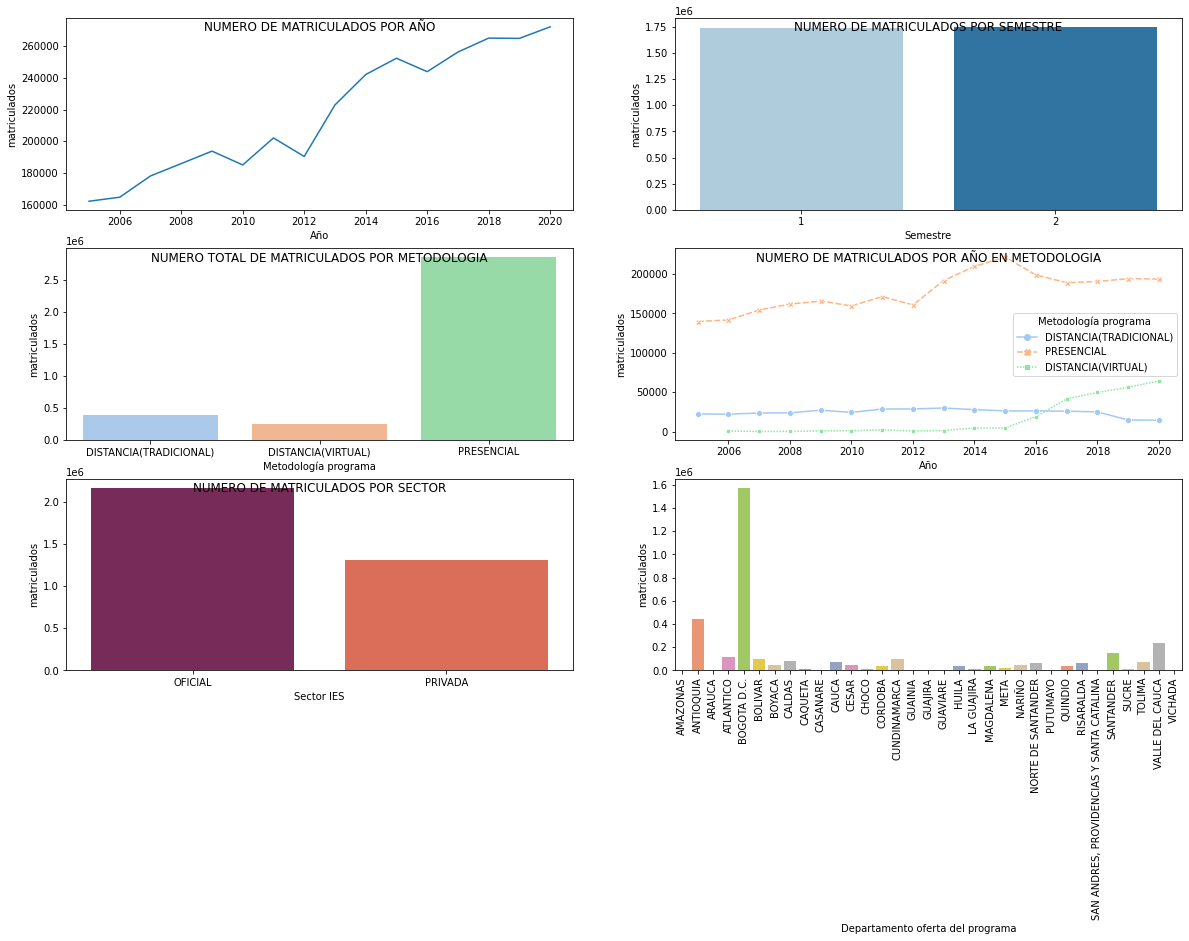

In [9]:
fig, ax = plt.subplots(3,2, figsize=(20,12))


mat1=graficas.groupby(['Año'])['Matriculados'].sum().reset_index(name='matriculados')
mat2=graficas.groupby(['Metodología programa'])['Matriculados'].sum().reset_index(name='matriculados')
mat3=graficas.groupby(['Semestre'])['Matriculados'].sum().reset_index(name='matriculados')
mat4=graficas.groupby(['Año','Metodología programa'])['Matriculados'].sum().reset_index(name='matriculados')
mat5=graficas.groupby(['Departamento oferta del programa'])['Matriculados'].sum().reset_index(name='matriculados')
mat6=graficas.groupby(['Sector IES'])['Matriculados'].sum().reset_index(name='matriculados')


sb.lineplot(x ='Año', y ='matriculados', data = mat1, ci=False, markers=True, ax=ax[0,0])
sb.barplot(x='Metodología programa', y='matriculados', data=mat2, palette="pastel", ax=ax[1,0])
sb.lineplot(x='Año', y='matriculados', data=mat4, hue='Metodología programa', style='Metodología programa', palette="pastel", ci=False, markers=True, ax=ax[1,1])
sb.barplot(x='Semestre', y='matriculados', data=mat3, palette="Paired", ax=ax[0,1])
sb.barplot(x ='Departamento oferta del programa', y = 'matriculados', data =mat5, palette="Set2")
sb.barplot(x='Sector IES', y='matriculados', data=mat6, palette="rocket", ax=ax[2,0])

plt.xticks(rotation=90)

ax[0, 0].set_title("NUMERO DE MATRICULADOS POR AÑO", position=(0.5, 0.9))
ax[0, 1].set_title("NUMERO DE MATRICULADOS POR SEMESTRE", position=(0.5, 0.9))
ax[1, 0].set_title("NUMERO TOTAL DE MATRICULADOS POR METODOLOGIA", position=(0.5, 0.9))
ax[1, 1].set_title("NUMERO DE MATRICULADOS POR AÑO EN METODOLOGIA", position=(0.5, 0.9))
ax[2, 0].set_title("NUMERO DE MATRICULADOS POR SECTOR", position=(0.5, 0.9))

plt.show()

In [44]:
df2=df.copy()

In [45]:
df2['Mes']= np.where(df2['Semestre']==2, '7', '1')

In [46]:
df2['Año'].astype('str')

0         2005
1         2005
2         2005
3         2005
4         2005
          ... 
540153    2020
540154    2020
540155    2020
540156    2020
540157    2020
Name: Año, Length: 540158, dtype: object

In [47]:
df2['Año_mes'] = df2['Año'].map(str) + "" + df2['Mes']

In [48]:
df2['Año_mes']=df2['Año_mes'].astype(int)

In [49]:
matriculas2= df2[df2['NBC']=='INGENIERIA DE SISTEMAS, TELEMATICA Y AFINES']
columns_to_keep = ['Año_mes','Matriculados']
matriculas2 =matriculas2[columns_to_keep]
matriculas2

,Año_mes,Matriculados
13,20057,2341
16,20051,2007
44,20051,1255
51,20057,1183
61,20057,1144
...,...,...
540076,20207,4
540080,20201,4
540081,20207,4
540129,20201,4


In [ ]:
matriculas2= matriculas2.groupby(['Año_mes'])['Matriculados'].sum().reset_index(name='matriculados2')

In [ ]:
matriculas2

,Año_mes,matriculados2
0,20051,83286
1,20057,78775
2,20061,83498
3,20067,81118
4,20071,89863
5,20077,88202
6,20081,94649
7,20087,91222
8,20091,100269
9,20097,93478


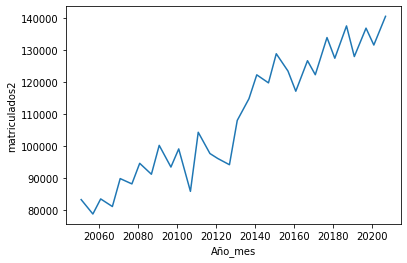

In [ ]:
sb.lineplot(x ='Año_mes', y ='matriculados2', data = matriculas2, ci=False, markers=True)

***Modelo lineal***


---



In [ ]:
model4 = 'matriculados2~Año_mes'
lm4   = sfm.ols(formula = model4, data = matriculas2).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:          matriculados2   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     294.3
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           4.71e-17
Time:                        19:20:08   Log-Likelihood:                -322.88
No. Observations:                  32   AIC:                             649.8
Df Residuals:                      30   BIC:                             652.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.849e+06   4.64e+05    -16.920      0.0

In [ ]:
predm=lm4.predict(pd.DataFrame(matriculas2['Año_mes']))
predm

0      77988.747042
1      80360.879481
2      81942.301107
3      84314.433546
4      85895.855172
5      88267.987611
6      89849.409237
7      92221.541676
8      93802.963302
9      96175.095742
10     97756.517368
11    100128.649807
12    101710.071433
13    104082.203872
14    105663.625498
15    108035.757937
16    109617.179563
17    111989.312002
18    113570.733628
19    115942.866067
20    117524.287693
21    119896.420132
22    121477.841758
23    123849.974198
24    125431.395824
25    127803.528263
26    129384.949889
27    131757.082328
28    133338.503954
29    135710.636393
30    137292.058019
31    139664.190458
dtype: float64

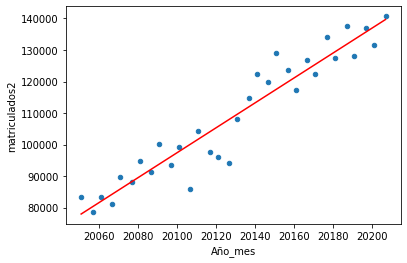

In [ ]:
matriculas2.plot(kind='scatter', x='Año_mes', y='matriculados2')
plt.plot(pd.DataFrame(matriculas2['Año_mes']), predm, c='red')

***Regresion lineal Simple***

---



In [ ]:
X = matriculas2.iloc[:, :-1].values
y = matriculas2.iloc[:, 1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
regressor1 = LinearRegression()
regressor1.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(regressor1.intercept_)

-7849282.508962043


In [ ]:
print(regressor1.coef_)

[395.35540651]


In [ ]:
graf_pred= (regressor1.coef_ * matriculas2['Año_mes'])+regressor1.intercept_
graf_pred

0      77988.747042
1      80360.879481
2      81942.301107
3      84314.433546
4      85895.855172
5      88267.987611
6      89849.409237
7      92221.541676
8      93802.963302
9      96175.095742
10     97756.517368
11    100128.649807
12    101710.071433
13    104082.203872
14    105663.625498
15    108035.757937
16    109617.179563
17    111989.312002
18    113570.733628
19    115942.866067
20    117524.287693
21    119896.420132
22    121477.841758
23    123849.974198
24    125431.395824
25    127803.528263
26    129384.949889
27    131757.082328
28    133338.503954
29    135710.636393
30    137292.058019
31    139664.190458
Name: Año_mes, dtype: float64

In [ ]:
y_pred1 = regressor1.predict(X_test)
y_pred1

array([135710.63639292, 108035.75793697, 125431.39582357, 111989.31200211,
        93802.96330248,  96175.09574156, 137292.05801898, 127803.52826265,
       101710.07143276,  77988.74704194])

In [ ]:
f = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
f

,Actual,Predicted
0,136965,135710.636393
1,94207,108035.757937
2,122383,125431.395824
3,114879,111989.312002
4,100269,93802.963302
5,93478,96175.095742
6,131684,137292.058019
7,134023,127803.528263
8,104368,101710.071433
9,83286,77988.747042


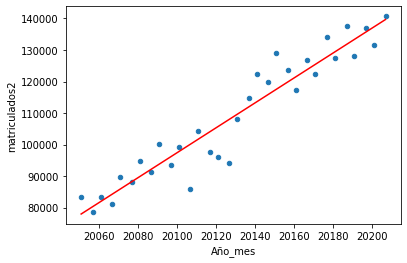

In [ ]:
matriculas2.plot(kind='scatter', x='Año_mes', y='matriculados2')
plt.plot(pd.DataFrame(matriculas2['Año_mes']), graf_pred, c='red')

In [ ]:
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print('R-squared score (training): {:.3f}'
     .format(regressor1.score(X, y)))
print('R-squared score (test): {:.3f}\n'
     .format(regressor1.score(X_test, y_test)))

Mean Absolute Error: 4996.704908622242
Mean Squared Error: 36479256.05793993
Root Mean Squared Error: 6039.8059619444675
R-squared score (training): 0.907
R-squared score (test): 0.889



In [ ]:
print('El r^2 es:',r2_score(y_test,y_pred1))

El r^2 es: 0.8891155606098675


In [ ]:
regressor1.predict([[20211]])

array([141245.61208411])

***La predicción final para el primer semestre del año 2021 es de: 141.245 personas matriculadas en el sector de las TIC***


-



---



---



#**Matriculados en educación superior - pregrado en el sector de las TIC por GENERO**



---



---



***Graficos***

In [10]:
graficas2= df[df['NBC']=='INGENIERIA DE SISTEMAS, TELEMATICA Y AFINES']
columns_to_keep = df.columns
graficas2 =graficas2[columns_to_keep]

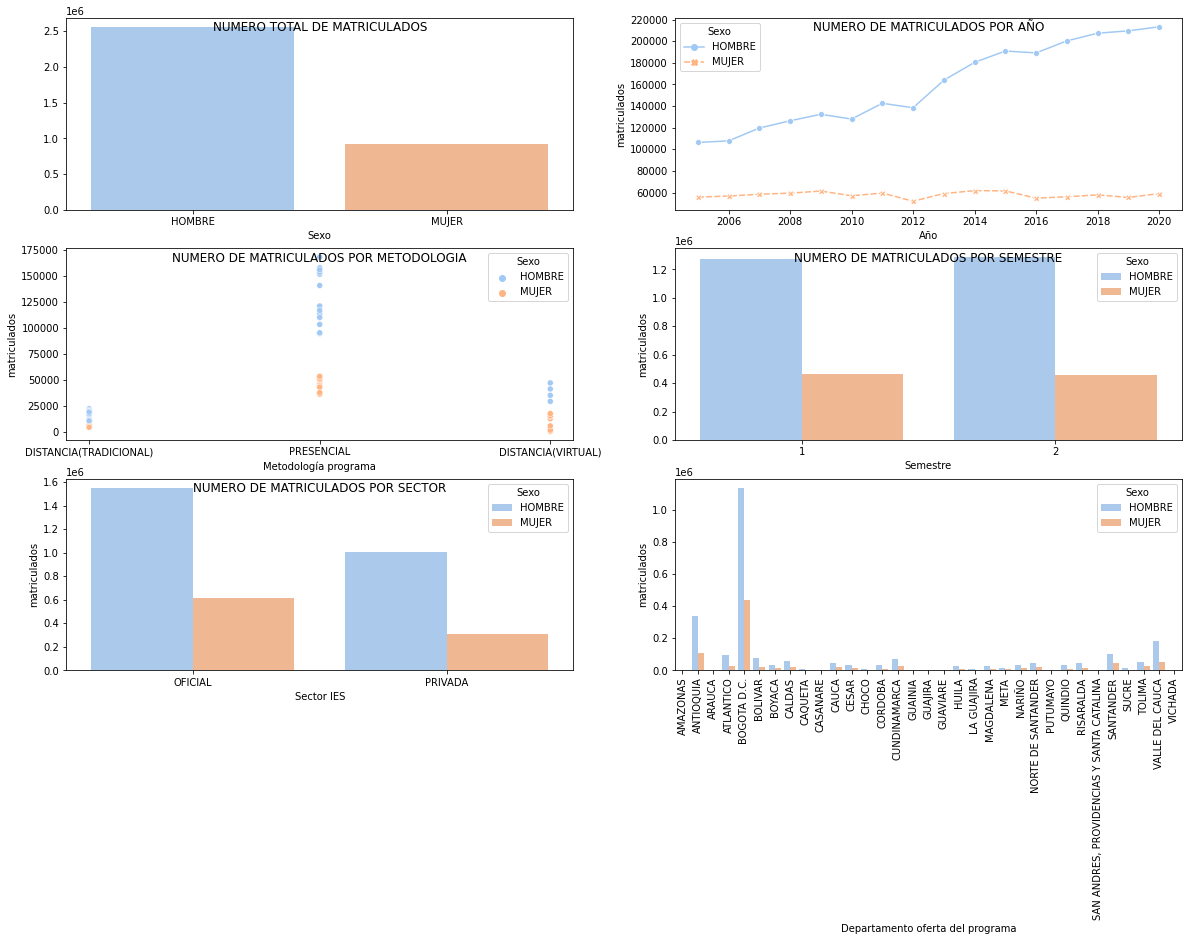

In [12]:
fig, ax = plt.subplots(3,2, figsize=(20,12))

matg1=graficas2.groupby('Sexo').Matriculados.sum()
matg2=graficas2.groupby(['Sexo','Año'])['Matriculados'].sum().reset_index(name='matriculados')
matg3=graficas2.groupby(['Sexo','Semestre'])['Matriculados'].sum().reset_index(name='matriculados')
matg4=graficas2.groupby(['Año','Sexo','Metodología programa'])['Matriculados'].sum().reset_index(name='matriculados')
matg5=graficas2.groupby(['Sexo','Departamento oferta del programa'])['Matriculados'].sum().reset_index(name='matriculados')
matg6=graficas2.groupby(['Sexo','Sector IES'])['Matriculados'].sum().reset_index(name='matriculados')


sb.barplot(x=matg1.index, y=matg1.values, palette="pastel", ax=ax[0,0])
sb.lineplot(x ='Año', y ='matriculados', data = matg2, hue = 'Sexo', style='Sexo',palette="pastel", ci=False, markers=True, ax=ax[0,1])
sb.scatterplot(x='Metodología programa', y='matriculados', data=matg4, hue='Sexo', palette="pastel", ci=False, markers=True, ax=ax[1,0])
sb.barplot(x='Semestre', y='matriculados', hue='Sexo', data=matg3, palette="pastel", ax=ax[1,1])
sb.barplot(x ='Departamento oferta del programa', y = 'matriculados', data =matg5, hue = 'Sexo', palette="pastel")
sb.barplot(x='Sector IES', y='matriculados', hue='Sexo', data=matg6, palette="pastel", ax=ax[2,0])
plt.xticks(rotation=90)


ax[0, 0].set_title("NUMERO TOTAL DE MATRICULADOS", position=(0.5, 0.9))
ax[0, 1].set_title("NUMERO DE MATRICULADOS POR AÑO", position=(0.5, 0.9))
ax[1, 1].set_title("NUMERO DE MATRICULADOS POR SEMESTRE", position=(0.5, 0.9))
ax[1, 0].set_title("NUMERO DE MATRICULADOS POR METODOLOGIA", position=(0.5, 0.9))
ax[2, 0].set_title("NUMERO DE MATRICULADOS POR SECTOR", position=(0.5, 0.9))

plt.show()

##***HOMBRE***

Se escogieron las columnas de: NBC (Nivel basico de conocimiento y hace referencia a la profesión a fin del sector de las TIc), sexo = hombre, año, semestre, numero de matriculados; Para predecir cuantos se matricularan en el año 2021 en el sector de las TIC

In [13]:
df3=df.copy()

In [14]:
df3['Mes']= np.where(df3['Semestre']==2, '7', '1')

In [15]:
df3['Año'].astype('str')

0         2005
1         2005
2         2005
3         2005
4         2005
          ... 
540153    2020
540154    2020
540155    2020
540156    2020
540157    2020
Name: Año, Length: 540158, dtype: object

In [16]:
df3['Año_mes'] = df3['Año'].map(str) + "" + df3['Mes']

In [17]:
df3['Año_mes']=df3['Año_mes'].astype(int)

In [18]:
matriculas3 = df3[(df3['NBC']=='INGENIERIA DE SISTEMAS, TELEMATICA Y AFINES') & (df3['Sexo']=='HOMBRE')]
columns_to_keep = ['Año_mes','Matriculados']
matriculas3 =matriculas3[columns_to_keep]
matriculas3

,Año_mes,Matriculados
13,20057,2341
16,20051,2007
44,20051,1255
51,20057,1183
61,20057,1144
...,...,...
539815,20207,4
539868,20201,4
539878,20201,4
539906,20207,4


In [ ]:
matriculas3= matriculas3.groupby([ 'Año_mes'])['Matriculados'].sum().reset_index(name='matriculados3')

In [ ]:
matriculas3

,Año_mes,matriculados3
0,20051,54157
1,20057,52159
2,20061,55217
3,20067,52609
4,20071,60268
5,20077,59399
6,20081,64019
7,20087,62377
8,20091,67950
9,20097,64444


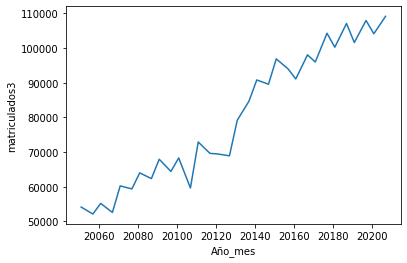

In [ ]:
sb.lineplot(x ='Año_mes', y ='matriculados3', data = matriculas3, ci=False, markers=True)

***Modelo lineal*** 


---



In [ ]:
model3 = 'matriculados3~+Año_mes'
lm3   = sfm.ols(formula = model3, data = matriculas3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:          matriculados3   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     524.2
Date:                Sat, 13 Nov 2021   Prob (F-statistic):           1.49e-20
Time:                        06:52:13   Log-Likelihood:                -313.74
No. Observations:                  32   AIC:                             631.5
Df Residuals:                      30   BIC:                             634.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.902e+06   3.49e+05    -22.666      0.0

In [ ]:
predm2=lm3.predict(pd.DataFrame(matriculas3['Año_mes']))
predm2

0      48961.546802
1      51340.884548
2      52927.109712
3      55306.447458
4      56892.672622
5      59272.010368
6      60858.235532
7      63237.573278
8      64823.798442
9      67203.136188
10     68789.361352
11     71168.699098
12     72754.924262
13     75134.262008
14     76720.487172
15     79099.824918
16     80686.050082
17     83065.387828
18     84651.612992
19     87030.950738
20     88617.175902
21     90996.513648
22     92582.738812
23     94962.076558
24     96548.301722
25     98927.639468
26    100513.864632
27    102893.202378
28    104479.427542
29    106858.765288
30    108444.990452
31    110824.328198
dtype: float64

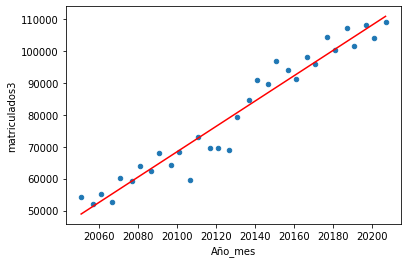

In [ ]:
matriculas3.plot(kind='scatter', x='Año_mes', y='matriculados3')
plt.plot(pd.DataFrame(matriculas3['Año_mes']), predm2, c='red')

***Regresion lineal Simple***

---


In [ ]:
X = matriculas3.iloc[:, :-1].values
y = matriculas3.iloc[:, 1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
regressor2 = LinearRegression()
regressor2.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(regressor2.intercept_)

-7902388.644095595


In [ ]:
print(regressor2.coef_)

[396.556291]


In [ ]:
graf2_pred= (regressor2.coef_ * matriculas3['Año_mes'])+regressor2.intercept_
graf2_pred

0      48961.546802
1      51340.884548
2      52927.109712
3      55306.447458
4      56892.672622
5      59272.010368
6      60858.235532
7      63237.573278
8      64823.798442
9      67203.136188
10     68789.361352
11     71168.699098
12     72754.924262
13     75134.262008
14     76720.487172
15     79099.824918
16     80686.050082
17     83065.387828
18     84651.612992
19     87030.950738
20     88617.175902
21     90996.513648
22     92582.738812
23     94962.076558
24     96548.301722
25     98927.639468
26    100513.864632
27    102893.202378
28    104479.427542
29    106858.765288
30    108444.990452
31    110824.328198
Name: Año_mes, dtype: float64

In [ ]:
y_pred2 = regressor2.predict(X_test)
y_pred2

array([106858.76528819,  79099.82491799,  96548.30172212,  83065.38782802,
        64823.79844189,  67203.13618791, 108444.9904522 ,  98927.63946814,
        72754.92426195,  48961.54680178])

In [ ]:
t = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
t

,Actual,Predicted
0,107974,106858.765288
1,68938,79099.824918
2,96001,96548.301722
3,84693,83065.387828
4,67950,64823.798442
5,64444,67203.136188
6,104140,108444.990452
7,104284,98927.639468
8,72928,72754.924262
9,54157,48961.546802


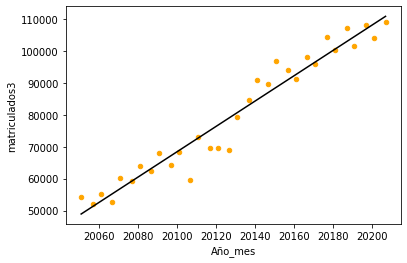

In [ ]:
matriculas3.plot(kind='scatter', x='Año_mes', y='matriculados3', c='orange')
plt.plot(pd.DataFrame(matriculas3['Año_mes']), graf2_pred, c='black')

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
print('R-squared score (training): {:.3f}'
     .format(regressor2.score(X, y)))
print('R-squared score (test): {:.3f}\n'
     .format(regressor2.score(X_test, y_test)))

Mean Absolute Error: 3436.719119025115
Mean Squared Error: 19908729.345599793
Root Mean Squared Error: 4461.919916986385
R-squared score (training): 0.946
R-squared score (test): 0.941



In [ ]:
print('El r^2 es:',r2_score(y_test,y_pred2))

El r^2 es: 0.9413658539402053


In [ ]:
regressor2.predict([[20211]])

array([112410.55336223])

***La predicción final para el primer semestre del año 2021 es de: 112.410 HOMBRES matriculados en el sector de las TIC***


-



---



##***MUJER***


Se escogieron las columnas de: NBC (Nivel basico de conocimiento y hace referencia a la profesión a fin del sector de las TIc), sexo = mujer, año, semestre, numero de matriculados; Para predecir cuantos se matricularan en el año 2021 en el sector de las TIC


In [19]:
df3['Fecha'] = df3.apply(lambda r: datetime(int(r['Año']), int(r['Mes']), 1), axis=1)

In [20]:
matriculas4 = df3[(df3['NBC']=='INGENIERIA DE SISTEMAS, TELEMATICA Y AFINES') & (df3['Sexo']=='MUJER')]
columns_to_keep = ['Fecha','Año_mes','Matriculados']
matriculas4 =matriculas4[columns_to_keep]
matriculas4

,Fecha,Año_mes,Matriculados
65,2005-07-01,20057,1128
85,2005-01-01,20051,1017
103,2005-07-01,20057,940
135,2005-01-01,20051,845
194,2005-07-01,20057,746
...,...,...,...
540076,2020-07-01,20207,4
540080,2020-01-01,20201,4
540081,2020-07-01,20207,4
540129,2020-01-01,20201,4


In [21]:
matriculas4= matriculas4.groupby([ 'Fecha', 'Año_mes'])['Matriculados'].sum().reset_index(name='matriculados4')

In [22]:
matriculas4

,Fecha,Año_mes,matriculados4
0,2005-01-01,20051,29129
1,2005-07-01,20057,26616
2,2006-01-01,20061,28281
3,2006-07-01,20067,28509
4,2007-01-01,20071,29595
5,2007-07-01,20077,28803
6,2008-01-01,20081,30630
7,2008-07-01,20087,28845
8,2009-01-01,20091,32319
9,2009-07-01,20097,29034


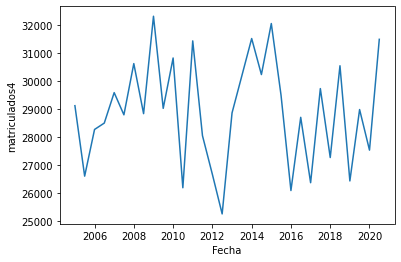

In [23]:
sb.lineplot(x ='Fecha', y ='matriculados4', data = matriculas4, ci=False, markers=True)

**SERIE DE TIEMPOS**

---



In [24]:
 matriculas4['periodo1']=matriculas4['matriculados4'].shift(1)

In [25]:
matriculas4['periodo2']=matriculas4['matriculados4'].shift(2)

In [26]:
matriculas4['periodo3']=matriculas4['matriculados4'].shift(3)

In [27]:
matriculas4['periodo4']=matriculas4['matriculados4'].shift(4)

In [28]:
matriculas4

,Fecha,Año_mes,matriculados4,periodo1,periodo2,periodo3,periodo4
0,2005-01-01,20051,29129,NaN,NaN,NaN,NaN
1,2005-07-01,20057,26616,29129.0,NaN,NaN,NaN
2,2006-01-01,20061,28281,26616.0,29129.0,NaN,NaN
3,2006-07-01,20067,28509,28281.0,26616.0,29129.0,NaN
4,2007-01-01,20071,29595,28509.0,28281.0,26616.0,29129.0
5,2007-07-01,20077,28803,29595.0,28509.0,28281.0,26616.0
6,2008-01-01,20081,30630,28803.0,29595.0,28509.0,28281.0
7,2008-07-01,20087,28845,30630.0,28803.0,29595.0,28509.0
8,2009-01-01,20091,32319,28845.0,30630.0,28803.0,29595.0
9,2009-07-01,20097,29034,32319.0,28845.0,30630.0,28803.0


***Regresion lineal Simple***

---


In [32]:
regressor3 = LinearRegression()
regressor3.fit(matriculas4[['periodo1','periodo2','periodo3', 'periodo4']][4:],matriculas4['matriculados4'][4:])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
y_pred3=regressor3.predict(matriculas4[['periodo1','periodo2','periodo3', 'periodo4']][4:])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



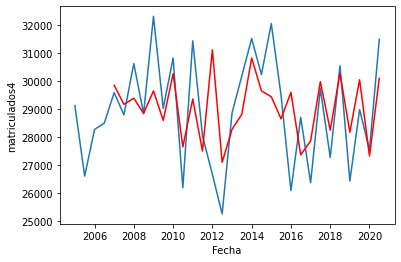

In [34]:
sb.lineplot(matriculas4['Fecha'], matriculas4['matriculados4'])
sb.lineplot(matriculas4['Fecha'][4:], y_pred, color='r')

In [39]:
model4 = 'periodo4~Año_mes'
lm4   = sfm.ols(formula = model4, data = matriculas4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:               periodo4   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                  0.002064
Date:                Sun, 14 Nov 2021   Prob (F-statistic):              0.964
Time:                        01:23:20   Log-Likelihood:                -250.69
No. Observations:                  28   AIC:                             505.4
Df Residuals:                      26   BIC:                             508.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.728e+04   1.83e+05      0.204      0.8

In [36]:
regressor3.predict(matriculas4[['matriculados4','periodo1','periodo2','periodo3']][-1:])

array([28754.94654795])

***La predicción final para el primer semestre del año 2021 es de: 28.754 MUJERES matriculadas en el sector de las TIC***
